In [44]:
# load data
from sklearn.datasets import load_iris

iris = load_iris()
data, target = iris.data, iris.target

## 数据预处理
### 无量纲化
#### 标准化
#### 归一化 - 区间缩放法
标准化按列操作，不改变数据的分布；
区间缩放方法（0,1），（-1， 1）等方式会改变分布
归一化按行操作，会改变数据的分布
总结，只有标准化不会改变数据的分布，原始距离，信息等

In [45]:
# 标准化
from sklearn.preprocessing import StandardScaler
# print(StandardScaler().fit_transform(data))
# 区间缩放-最小最大缩放
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
# print(MinMaxScaler().fit_transform(data))
# 归一化
from sklearn.preprocessing import Normalizer
# print(Normalizer().fit_transform(data))

In [46]:
# 对比分布
import seaborn as sns
# help(sns.kdeplot)
sepal_length = data[:, 0]
standard_sepal_length = StandardScaler().fit_transform(sepal_length.reshape(-1, 1)).reshape(-1)
minmax_sepal_length = MinMaxScaler().fit_transform(sepal_length.reshape(-1, 1)).reshape(-1)
maxabs_sepal_length = MaxAbsScaler().fit_transform(sepal_length.reshape(-1, 1)).reshape(-1)
normalize_sepal_length = Normalizer().fit_transform(data)[:, 0]

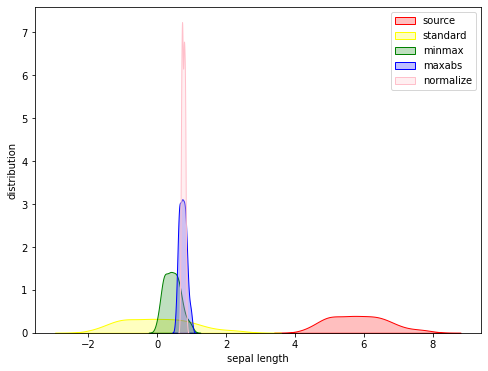

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
ax  = plt.subplot(1, 1, 1)
ax = sns.kdeplot(sepal_length, color='red', shade=True)
ax = sns.kdeplot(x=standard_sepal_length, color='yellow', shade=True)
ax = sns.kdeplot(minmax_sepal_length, color='green', shade=True)
ax = sns.kdeplot(maxabs_sepal_length, color='blue', shade=True)
ax = sns.kdeplot(normalize_sepal_length, color='pink', shade=True)
ax.set_xlabel('sepal length')
ax.set_ylabel('distribution')
ax = ax.legend(['source', 'standard', 'minmax', 'maxabs', 'normalize'])
plt.show()

In [51]:
### 定量二值化
from sklearn.preprocessing import Binarizer
#  默认大于0的都转换为1，小于0的转换成0
print("原始数据")
print(data[:5, :])
binary_data = Binarizer().fit_transform(data)
print("默认二值转换")
print(binary_data[:5, :])
print("阈值为2的二值转换")
binary_data_threshold = Binarizer(threshold=2).fit_transform(data)
print(binary_data_threshold[:5, :])

原始数据
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
默认二值转换
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
阈值为2的二值转换
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]]


In [62]:
### 哑变量编码
from sklearn.preprocessing import OneHotEncoder
onehot_target = OneHotEncoder().fit_transform(target.reshape(-1, 1))
print('OneHot编码：\n', onehot_target[:5])
import pandas as pd
dummy_target = pd.get_dummies(target)
print('OneHot编码：\n', dummy_target[:5])

OneHot编码：
   (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
OneHot编码：
    0  1  2
0  1  0  0
1  1  0  0
2  1  0  0
3  1  0  0
4  1  0  0


In [73]:
###缺失值计算
from sklearn.impute import SimpleImputer
from numpy import vstack, hstack, array, nan
vstack_data = vstack((array([nan, nan, nan, nan]), data))
# print(vstack_data[:5, ])
imputer_data = SimpleImputer(strategy='mean').fit_transform(vstack_data)
print(imputer_data[:5, :])

[[5.84333333 3.05733333 3.758      1.19933333]
 [5.1        3.5        1.4        0.2       ]
 [4.9        3.         1.4        0.2       ]
 [4.7        3.2        1.3        0.2       ]
 [4.6        3.1        1.5        0.2       ]]


In [81]:
### 数据变换
from sklearn.preprocessing import PolynomialFeatures
# 默认degree=2
poly_data = PolynomialFeatures().fit_transform(data)
print('原始维度： ', data.shape[1])
print('默认参数degree=1转换后的维度： ', PolynomialFeatures(degree=1).fit_transform(data).shape[1])
print('默认参数degree=2转换后的维度： ', PolynomialFeatures(degree=2).fit_transform(data).shape[1])
print('默认参数degree=3转换后的维度： ', PolynomialFeatures(degree=3).fit_transform(data).shape[1])
print('默认参数degree=4转换后的维度： ', PolynomialFeatures(degree=4).fit_transform(data).shape[1])

# 元素维度：  4
# 默认参数degree=1转换后的维度：  5  一阶相当于增加了一个bias
# 默认参数degree=2转换后的维度：  15 二阶是[a, b] ->  [1, a, b, a^2, ab, b^2]从一个维度变成3个维度
# 默认参数degree=3转换后的维度：  35 三阶是[a, b] ->  [1, a, b, a^2, ab, b^2, ab^2, ba^2, a^3, b^3] 不对
# 默认参数degree=4转换后的维度：  70

# 指数函数变换
from sklearn.preprocessing import FunctionTransformer
from numpy import log1p
log_data = FunctionTransformer(func=log1p).fit_transform(data)
print('对数转换后的维度', log_data.shape)
print(log_data[:5, :])
from numpy import expm1
exp_data = FunctionTransformer(func=expm1).fit_transform(data)
print('指数转换后的维度', exp_data.shape)
print(exp_data[:5, :])

原始维度：  4
默认参数degree=1转换后的维度：  5
默认参数degree=2转换后的维度：  15
默认参数degree=3转换后的维度：  35
默认参数degree=4转换后的维度：  70
对数转换后的维度 (150, 4)
[[1.80828877 1.5040774  0.87546874 0.18232156]
 [1.77495235 1.38629436 0.87546874 0.18232156]
 [1.74046617 1.43508453 0.83290912 0.18232156]
 [1.7227666  1.41098697 0.91629073 0.18232156]
 [1.79175947 1.5260563  0.87546874 0.18232156]]
指数转换后的维度 (150, 4)
[[163.0219073   32.11545196   3.05519997   0.22140276]
 [133.28977968  19.08553692   3.05519997   0.22140276]
 [108.94717245  23.5325302    2.66929667   0.22140276]
 [ 98.48431564  21.19795128   3.48168907   0.22140276]
 [147.4131591   35.59823444   3.05519997   0.22140276]]


# 特征选择
是否选择特征主要从两方面考虑：
- 1、特征是否发散，如果特征不发散，方差接近0，说明样本在该特征上基本没有差异，所以该特征对于样本的区分没有什么用
- 2、特征与目标的相关性：相关性高的优先选择

根据特征选择的形式又可以将特征选择方法分为3种：

- Filter：过滤法，按照发散性或者相关性对各个特征进行评分，设定阈值或者待选择阈值的个数，选择特征。
- Wrapper：包装法，根据目标函数（通常是预测效果评分），每次选择若干特征，或者排除若干特征。
- Embedded：嵌入法，先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据系数从大到小选择特征。类似于Filter方法，但是是通过训练来确定特征的优劣。


In [93]:
# Filter
## 方差选择
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr
from scipy.stats import chi2

#由于MINE的设计不是函数式的，定义mic方法将其为函数式的，返回一个二元组，二元组的第2项设置成固定的P值0.5
def mic(x, y):
    m = MINE()
    m.compute_score(x, y)
    return (m.mic(), 0.5)

# help(VarianceThreshold)
print("原始维度", data.shape[1])
variance_data  = VarianceThreshold(threshold=0).fit_transform(data)
# print("方差选择后的维度", variance_data.shape[1])
# pearsonr_data = SelectKBest(pearsonr, k=2).fit_transform(data, target)
# print("Pearsonr选择后的维度", pearsonr_data.shape[1])
# chi2_data = SelectKBest(chi2, k=2).fit_transform(data, target)
# print("Chi2选择后的维度", chi2_data.shape[1])
# mut_data = SelectKBest(mic, k=2).fit_transform(data, target)
# print("互信息选择后的维度", chi2_data.mutu_datashape[1])

原始维度 4


In [97]:
#  包装法 递归消除法
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
print("原始维度", data.shape[1])
rfe_data = RFE(estimator=LogisticRegression(penalty='l2'), n_features_to_select=2).fit_transform(data, target)
print("递归消除后的维度", rfe_data.shape[1])

原始维度 4
递归消除后的维度 2


D:\DevTools\Ana3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
# 嵌入
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
print("原始维度", data.shape[1])
logistic_data = SelectFromModel(estimator=LogisticRegression(penalty='l2', C=0.1)).fit_transform(data, target)
print("Logistic训练后的维度", rfe_data.shape[1])
gbdt_data = SelectFromModel(estimator=GradientBoostingClassifier()).fit_transform(data, target)
print("GBDT训练后的维度", gbdt_data.shape[1])

原始维度 4
Logistic训练后的维度 2
GBDT训练后的维度 2


In [104]:
# 降维
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pca_data = PCA(n_components=2).fit_transform(data)
lda_data = LinearDiscriminantAnalysis(n_components=2).fit_transform(data, target)

In [115]:
from joblib import parallel, delayed
help(delayed)

Help on function delayed in module joblib.parallel:

delayed(function)
    Decorator used to capture the arguments of a function.



In [113]:
from sklearn.pipeline import FeatureUnion, _fit_one_transformer, _fit_transform_one, _transform_one 
from sklearn.externals.joblib import Parallel, delayed
from scipy import sparse
import numpy as np
from numpy import log1p
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import Binarizer
from sklearn.pipeline import FeatureUnion
from numpy import hstack, vstack, array, median, nan
from numpy.random import choice
from sklearn.datasets import load_iris

#特征矩阵加工
#使用vstack增加一行含缺失值的样本(nan, nan, nan, nan)
#使用hstack增加一列表示花的颜色（0-白、1-黄、2-红），花的颜色是随机的，意味着颜色并不影响花的分类
iris.data = hstack((choice([0, 1, 2], size=iris.data.shape[0]+1).reshape(-1,1), vstack((iris.data, array([nan, nan, nan, nan]).reshape(1,-1)))))
#目标值向量加工
#增加一个目标值，对应含缺失值的样本，值为众数
iris.target = hstack((iris.target, array([median(iris.target)])))

#部分并行处理，继承FeatureUnion
class FeatureUnionExt(FeatureUnion):
    #相比FeatureUnion，多了idx_list参数，其表示每个并行工作需要读取的特征矩阵的列
    def __init__(self, transformer_list, idx_list, n_jobs=1, transformer_weights=None):
        self.idx_list = idx_list
        FeatureUnion.__init__(self, transformer_list=map(lambda trans:(trans[0], trans[1]), transformer_list), n_jobs=n_jobs, transformer_weights=transformer_weights)

    #由于只部分读取特征矩阵，方法fit需要重构
    def fit(self, X, y=None):
        transformer_idx_list = map(lambda trans, idx:(trans[0], trans[1], idx), self.transformer_list, self.idx_list)
        transformers = Parallel(n_jobs=self.n_jobs)(
            #从特征矩阵中提取部分输入fit方法
            delayed(_fit_one_transformer)(trans, X[:,idx], y)
            for name, trans, idx in transformer_idx_list)
        self._update_transformer_list(transformers)
        return self

    #由于只部分读取特征矩阵，方法fit_transform需要重构
    def fit_transform(self, X, y=None, **fit_params):
        transformer_idx_list = map(lambda trans, idx:(trans[0], trans[1], idx), self.transformer_list, self.idx_list)
        result = Parallel(n_jobs=self.n_jobs)(
            #从特征矩阵中提取部分输入fit_transform方法
            delayed(_fit_transform_one)(trans, name, X[:,idx], y,
                                        self.transformer_weights, **fit_params)
            for name, trans, idx in transformer_idx_list)

        Xs, transformers = zip(*result)
        self._update_transformer_list(transformers)
        if any(sparse.issparse(f) for f in Xs):
            Xs = sparse.hstack(Xs).tocsr()
        else:
            Xs = np.hstack(Xs)
        return Xs

    #由于只部分读取特征矩阵，方法transform需要重构
    def transform(self, X):
        transformer_idx_list = map(lambda trans, idx:(trans[0], trans[1], idx), self.transformer_list, self.idx_list)
        Xs = Parallel(n_jobs=self.n_jobs)(
            #从特征矩阵中提取部分输入transform方法
            delayed(_transform_one)(trans, name, X[:,idx], self.transformer_weights)
            for name, trans, idx in transformer_idx_list)
        if any(sparse.issparse(f) for f in Xs):
            Xs = sparse.hstack(Xs).tocsr()
        else:
            Xs = np.hstack(Xs)
        return Xs

ImportError: cannot import name '_fit_one_transformer' from 'sklearn.pipeline' (D:\DevTools\Ana3\envs\tf\lib\site-packages\sklearn\pipeline.py)

In [ ]:
####################整体并行处理############################
#新建将整体特征矩阵进行对数函数转换的对象
step2_1 = ('ToLog', FunctionTransformer(log1p))
#新建将整体特征矩阵进行二值化类的对象
step2_2 = ('ToBinary', Binarizer())
#新建整体并行处理对象
#该对象也有fit和transform方法，fit和transform方法均是并行地调用需要并行处理的对象的fit和transform方法
#参数transformer_list为需要并行处理的对象列表，该列表为二元组列表，第一元为对象的名称，第二元为对象
step2 = ('FeatureUnion', FeatureUnion(transformer_list=[step2_1, step2_2, step2_3]))

####################部分并行处理############################
#新建将部分特征矩阵进行定性特征编码的对象
step2_1 = ('OneHotEncoder', OneHotEncoder(sparse=False))
#新建将部分特征矩阵进行对数函数转换的对象
step2_2 = ('ToLog', FunctionTransformer(log1p))
#新建将部分特征矩阵进行二值化类的对象
step2_3 = ('ToBinary', Binarizer())

####################流水线处理############################
#新建部分并行处理对象
#参数transformer_list为需要并行处理的对象列表，该列表为二元组列表，第一元为对象的名称，第二元为对象
#参数idx_list为相应的需要读取的特征矩阵的列
step2 = ('FeatureUnionExt', FeatureUnionExt(transformer_list=[step2_1, step2_2, step2_3], idx_list=[[0], [1, 2, 3], [4]]))
#新建计算缺失值的对象
step1 = ('Imputer', Imputer())
#新建将部分特征矩阵进行定性特征编码的对象
step2_1 = ('OneHotEncoder', OneHotEncoder(sparse=False))
#新建将部分特征矩阵进行对数函数转换的对象
step2_2 = ('ToLog', FunctionTransformer(log1p))
#新建将部分特征矩阵进行二值化类的对象
step2_3 = ('ToBinary', Binarizer())
#新建部分并行处理对象，返回值为每个并行工作的输出的合并
step2 = ('FeatureUnionExt', FeatureUnionExt(transformer_list=[step2_1, step2_2, step2_3], idx_list=[[0], [1, 2, 3], [4]]))
#新建无量纲化对象
step3 = ('MinMaxScaler', MinMaxScaler())
#新建卡方校验选择特征的对象
step4 = ('SelectKBest', SelectKBest(chi2, k=3))
#新建PCA降维的对象
step5 = ('PCA', PCA(n_components=2))
#新建逻辑回归的对象，其为待训练的模型作为流水线的最后一步
step6 = ('LogisticRegression', LogisticRegression(penalty='l2'))
#新建流水线处理对象
#参数steps为需要流水线处理的对象列表，该列表为二元组列表，第一元为对象的名称，第二元为对象
pipeline = Pipeline(steps=[step1, step2, step3, step4, step5, step6])

####################自动化调参############################
#新建网格搜索对象
#第一参数为待训练的模型
 #param_grid为待调参数组成的网格，字典格式，键为参数名称（格式“对象名称__子对象名称__参数名称”），值为可取的参数值列表
 grid_search = GridSearchCV(pipeline, param_grid={'FeatureUnionExt__ToBinary__threshold':[1.0, 2.0, 3.0, 4.0], 'LogisticRegression__C':[0.1, 0.2, 0.4, 0.8]})
#训练以及调参
grid_search.fit(iris.data, iris.target)


####################持久化数据############################
#持久化数据
#第一个参数为内存中的对象
#第二个参数为保存在文件系统中的名称
#第三个参数为压缩级别，0为不压缩，3为合适的压缩级别
dump(grid_search, 'grid_search.dmp', compress=3)
#从文件系统中加载数据到内存中
grid_search = load('grid_search.dmp')

In [111]:
# from sklearn.externals.jo import dump
import joblib
help(joblib.dump)

Help on function dump in module joblib.numpy_pickle:

dump(value, filename, compress=0, protocol=None, cache_size=None)
    Persist an arbitrary Python object into one file.
    
    Read more in the :ref:`User Guide <persistence>`.
    
    Parameters
    -----------
    value: any Python object
        The object to store to disk.
    filename: str, pathlib.Path, or file object.
        The file object or path of the file in which it is to be stored.
        The compression method corresponding to one of the supported filename
        extensions ('.z', '.gz', '.bz2', '.xz' or '.lzma') will be used
        automatically.
    compress: int from 0 to 9 or bool or 2-tuple, optional
        Optional compression level for the data. 0 or False is no compression.
        Higher value means more compression, but also slower read and
        write times. Using a value of 3 is often a good compromise.
        See the notes for more details.
        If compress is True, the compression level use